In [3]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(0)

In [4]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [27]:
class Neural_Network:
    def __init__(self, n_h, n_x, n_y):
        self.W1 = np.random.randn(n_h, n_x) * 0.01
        self.B1 = np.zeros((n_h, 1))
        self.W2 = np.random.randn(n_y, n_h) * 0.01
        self.B2 = np.zeros((n_y, 1))
        print(f"Initial Weights/Biases are \n {self.W1} \n ==== \n {self.W2} \n ==== \n {self.B1} \n ==== \n {self.B2}")
        
        
    def run(self, X, Y, epochs, alpha):
        costs = []
        for i in range(epochs):
            cost, params = self.forward_propagate(X, Y)
            costs.append(cost)
            grads = self.back_prop(X, Y, params)
            self.update_parameters(grads, alpha)
        return costs
    
    def forward_propagate(self, X, Y):
        m = X.shape[1] # Number of examples
        Z1 = np.dot(self.W1, X) + self.B1
        A1 = sigmoid(Z1)
        
        Z2 = np.dot(self.W2, A1) + self.B2
        A2 = sigmoid(Z2)
        
        logprobs = np.multiply(np.log(A2), Y) + np.multiply(np.log(1 - A2), (1 - Y))
        cost = -np.sum(logprobs) / m
        params = {"A1": A1, "A2": A2, "Z1": Z1}
        return cost, params
    
    def back_prop(self, X, Y, params):
        m = X.shape[1]
        A1 = params["A1"]
        A2 = params["A2"]
        Z1 = params["Z1"]
        
        dZ2 = A2 - Y
        dW2 = np.dot(dZ2, A1.T) / m
        dB2 = np.sum(dZ2, axis=1, keepdims=True) / m
        
        dZ1 = np.multiply(np.dot(self.W2.T, dZ2), A1 * (1 - A1))
        dW1 = np.dot(dZ1, X.T) / m
        dB1 = np.sum(dZ1, axis=1, keepdims=True) / m
        
        grads = {"dW1": dW1, "dW2": dW2, "dB1": dB1, "dB2": dB2}
        return grads
    
    def update_parameters(self, grads, alpha):
        dW1 = grads["dW1"]
        dW2 = grads["dW2"]
        dB1 = grads["dB1"]
        dB2 = grads["dB2"]
        
        self.W1 = self.W1 - (alpha * dW1)
        self.W2 = self.W2 - (alpha * dW2)
        self.B1 = self.B1 - (alpha * dB1)
        self.B2 = self.B2 - (alpha * dB2)
        

In [22]:
X = np.array([
    [0, 0, 1, 1],
    [0, 1, 0, 1],
])
Y = np.array([
    [0, 1, 1, 0],
])
n_h = 2 # Number of hidden units
n_x = X.shape[0] # Number of input features
n_y = Y.shape[0] # Number of output

Initial Weights/Biases are 
 [[ 0.02269755 -0.01454366]
 [ 0.00045759 -0.00187184]] 
 ==== 
 [[0.01532779 0.01469359]] 
 ==== 
 [[0.]
 [0.]] 
 ==== 
 [[0.]]


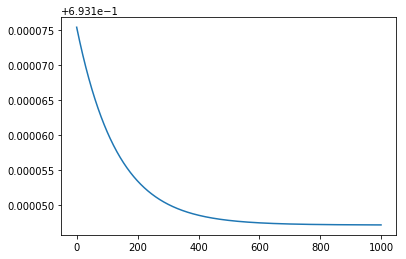

In [28]:
network = Neural_Network(n_h, n_x, n_y)
costs = network.run(X, Y, 1000, 0.01)
plt.plot(costs)

In [29]:
cost, params = network.forward_propagate(X, Y)

In [30]:
params["A2"]

array([[0.5000853 , 0.50007466, 0.50010036, 0.50008971]])

In [31]:
cost

0.6931471962614403